In [1]:
# Import all required libraries

import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

# Load data & read data using pandas

In [2]:
#import avacado data files
df=pd.read_csv("F:/Pranjali/Data Science/Eval Project/Data Files/Auto_Insurance_Claim_Amount.csv")

In [3]:
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/2011,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/2011,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/2011,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/2011,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/2011,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.rename(columns={'State Code' : 'State_Code','Claim Amount' : 'Claim_Amount','Effective To Date' : 'Effective_To_Date','Location Code' : 'Location_Code','Marital Status' : 'Marital_Status','Monthly Premium Auto' : 'Monthly_Premium_Auto','Months Since Last Claim' : 'Months_Since_Last_Claim','Months Since Policy Inception' : 'Months_Since_Policy_Inception','Number of Open Complaints' : 'Number_of_Open_Complaints','Number of Policies' : 'Number_of_Policies','Policy Type' : 'Policy_Type','Claim Reason' : 'Claim_Reason','Sales Channel' : 'Sales_Channel','Total Claim Amount' : 'Total_Claim_Amount','Vehicle Class' : 'Vehicle_Class','Vehicle Size' : 'Vehicle_Size'}, inplace=True)
print(df.columns)

Index(['Customer', 'Country', 'State_Code', 'State', 'Claim_Amount',
       'Response', 'Coverage', 'Education', 'Effective_To_Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location_Code',
       'Marital_Status', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Number_of_Open_Complaints',
       'Number_of_Policies', 'Policy_Type', 'Policy', 'Claim_Reason',
       'Sales_Channel', 'Total_Claim_Amount', 'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')


In [5]:
df.head(1)

,Customer,Country,State_Code,State,Claim_Amount,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Claim_Reason,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/2011,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize


In [6]:
# Checking for null values & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Country                        9134 non-null   object 
 2   State_Code                     9134 non-null   object 
 3   State                          9134 non-null   object 
 4   Claim_Amount                   9134 non-null   float64
 5   Response                       9134 non-null   object 
 6   Coverage                       9134 non-null   object 
 7   Education                      9134 non-null   object 
 8   Effective_To_Date              9134 non-null   object 
 9   EmploymentStatus               9134 non-null   object 
 10  Gender                         9134 non-null   object 
 11  Income                         9134 non-null   int64  
 12  Location_Code                  9134 non-null   o

In [7]:
#distribution of categorical feature
df.describe(include=['O'])

,Customer,Country,State_Code,State,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Claim_Reason,Sales_Channel,Vehicle_Class,Vehicle_Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,1,5,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,AT89553,US,MO,Missouri,No,Basic,Bachelor,1/10/2011,Employed,F,Suburban,Married,Personal Auto,Personal L3,Collision,Agent,Four-Door Car,Medsize
freq,1,9134,3150,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [8]:
df.describe()

,Claim_Amount,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
df.head(2)

,Customer,Country,State_Code,State,Claim_Amount,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Claim_Reason,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/2011,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/2011,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize


In [10]:
# class distribution of target
print(df.groupby('State_Code').size())

State_Code
IA    2601
KS     798
MO    3150
NE    1703
OK     882
dtype: int64


In [11]:
# class distribution of target 
print(df.groupby('Claim_Amount').size())

Claim_Amount
189.800768     1
189.868369     1
190.400085     1
191.811970     1
194.098122     1
              ..
6602.575407    1
6790.727050    1
7322.595652    1
7422.851604    1
8332.538119    1
Length: 8041, dtype: int64


In [12]:
# class distribution of target 
print(df.groupby('Number_of_Policies').size())

Number_of_Policies
1    3251
2    2294
3    1168
4     409
5     407
6     372
7     433
8     384
9     416
dtype: int64


In [13]:
# class distribution of target 
print(df.groupby('Policy').size())

Policy
Corporate L1     359
Corporate L2     595
Corporate L3    1014
Personal L1     1240
Personal L2     2122
Personal L3     3426
Special L1        66
Special L2       164
Special L3       148
dtype: int64


# Convert all float datatypes into interger using LabelEncoder

In [14]:
# Use for loop to convert all data types into interger data types for all columns

from sklearn.preprocessing import LabelEncoder
label_encoders = LabelEncoder()

label_encoders = {}
categorical_columns = ['Customer','Country','State_Code','State','Claim_Amount','Response','Coverage','Education','Effective_To_Date','EmploymentStatus','Gender','Income','Location_Code','Marital_Status','Monthly_Premium_Auto','Months_Since_Last_Claim','Months_Since_Policy_Inception','Number_of_Open_Complaints','Number_of_Policies','Policy_Type','Policy','Claim_Reason','Sales_Channel','Total_Claim_Amount','Vehicle_Class','Vehicle_Size']  # need to use columns_names for pandas & for numpy use range(n) instead

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])  # if numpy instead of pandas use X[:, column] instead

In [15]:
# Checking datatypes after using label encoder for all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Customer                       9134 non-null   int32
 1   Country                        9134 non-null   int32
 2   State_Code                     9134 non-null   int32
 3   State                          9134 non-null   int32
 4   Claim_Amount                   9134 non-null   int64
 5   Response                       9134 non-null   int32
 6   Coverage                       9134 non-null   int32
 7   Education                      9134 non-null   int32
 8   Effective_To_Date              9134 non-null   int32
 9   EmploymentStatus               9134 non-null   int32
 10  Gender                         9134 non-null   int32
 11  Income                         9134 non-null   int64
 12  Location_Code                  9134 non-null   int32
 13  Marital_Status    

In [16]:
df.head(2)

,Customer,Country,State_Code,State,Claim_Amount,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Claim_Reason,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,600,0,1,1,975,0,0,0,47,1,...,5,0,0,0,2,0,0,2941,5,1
1,5946,0,3,3,4659,0,1,0,24,4,...,42,0,7,1,5,3,0,4880,0,1


# Statistical Data Analysis -

In [17]:
df.shape

(9134, 26)

In [18]:
df.describe()

,Customer,Country,State_Code,State,Claim_Amount,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Claim_Reason,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
count,9134.000000,9134.0,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,...,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,4566.500000,0.0,1.722684,1.722684,4014.059229,0.143201,0.480622,1.554084,28.625575,1.825706,...,48.064594,0.384388,1.966170,0.825925,3.797788,1.014889,1.102693,2853.993103,1.892380,1.089556
std,2636.903013,0.0,1.312397,1.312397,2328.042818,0.350297,0.655817,1.381978,17.017215,1.347793,...,27.905991,0.910384,2.390182,0.475989,1.605978,1.072331,1.069452,1290.348454,2.072992,0.537313
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2283.250000,0.0,0.000000,0.000000,1996.250000,0.000000,0.000000,0.000000,14.000000,1.000000,...,24.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,2108.250000,0.000000,1.000000
50%,4566.500000,0.0,2.000000,2.000000,3990.000000,0.000000,0.000000,1.000000,28.000000,1.000000,...,48.000000,0.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2935.500000,0.000000,1.000000
75%,6849.750000,0.0,3.000000,3.000000,6047.750000,0.000000,1.000000,3.000000,44.000000,4.000000,...,71.000000,0.000000,3.000000,1.000000,5.000000,2.000000,2.000000,3825.750000,4.000000,1.000000
max,9133.000000,0.0,4.000000,4.000000,8040.000000,1.000000,2.000000,4.000000,58.000000,4.000000,...,99.000000,5.000000,8.000000,2.000000,8.000000,3.000000,3.000000,5105.000000,5.000000,2.000000


# EDA - Analyse the data set stats using plots

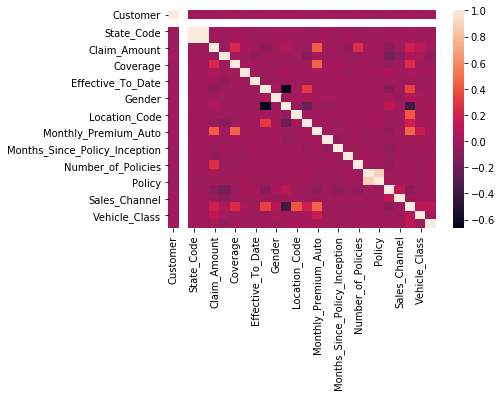

In [19]:
# checking correlation using heatmap
dfcor=df.corr()
sns.heatmap(dfcor)

Above graph shows correlation between these columns State_Code, Claim_Amount, Number_of_Policies, Policy.

# Data Visualization - Unvariate plot / Multivariate Plots

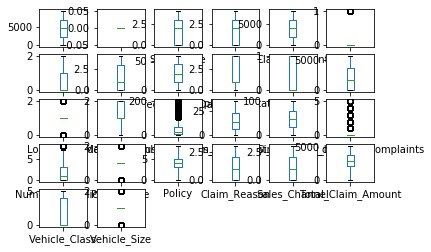

In [20]:
# Data Visualization - Unvariate plot (box and whisker plots)
df.plot(kind='box', subplots=True, layout=(5,6), sharex=False, sharey=False)
plt.show()

As per above univariate analysis ,columns name Response, Location_Code, Number_of_Open_Complaints, Number_of_Policies, Policy_Type, Vehicle_Size having data with outliers,non scaled data.

In [21]:
# Checking for skewness for each of the column
df.skew()

Customer                         0.000000
Country                          0.000000
State_Code                       0.021065
State                            0.021065
Claim_Amount                     0.004370
Response                         2.037567
Coverage                         1.031310
Education                        0.333148
Effective_To_Date                0.033899
EmploymentStatus                 0.832147
Gender                           0.039866
Income                           0.371418
Location_Code                    0.009511
Marital_Status                  -0.107553
Monthly_Premium_Auto             1.977663
Months_Since_Last_Claim          0.278586
Months_Since_Policy_Inception    0.040165
Number_of_Open_Complaints        2.783263
Number_of_Policies               1.253333
Policy_Type                     -0.468383
Policy                          -0.427639
Claim_Reason                     0.733526
Sales_Channel                    0.506774
Total_Claim_Amount              -0

In [22]:
# Check for the outliers,apply zscore & remove skewness

from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(9134, 26)
(0, 26)


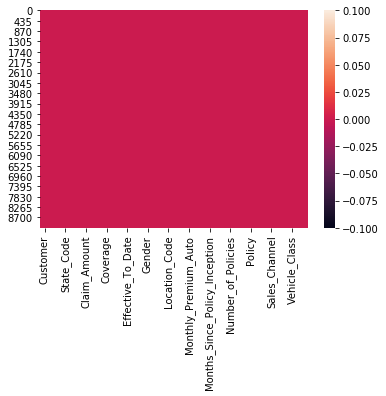

In [23]:
# Checking missing values using heatmap
sns.heatmap(df.isnull())

In [24]:
# Check null values using info() function or isnull() or notnull() method.
nullval=df.isnull().sum()
nullval

Customer                         0
Country                          0
State_Code                       0
State                            0
Claim_Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective_To_Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location_Code                    0
Marital_Status                   0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
Policy_Type                      0
Policy                           0
Claim_Reason                     0
Sales_Channel                    0
Total_Claim_Amount               0
Vehicle_Class                    0
Vehicle_Size                     0
dtype: int64

In [25]:
import pandas as pd

cols = df.columns.tolist()
print(cols)

['Customer', 'Country', 'State_Code', 'State', 'Claim_Amount', 'Response', 'Coverage', 'Education', 'Effective_To_Date', 'EmploymentStatus', 'Gender', 'Income', 'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type', 'Policy', 'Claim_Reason', 'Sales_Channel', 'Total_Claim_Amount', 'Vehicle_Class', 'Vehicle_Size']


# Preparing X & y for Machine Learning Algorithm -

In [26]:
import pandas as pd
X = df[['Customer','Country','State_Code','State','Response','Coverage','Education','Effective_To_Date','EmploymentStatus','Gender','Income','Location_Code','Marital_Status','Monthly_Premium_Auto','Months_Since_Last_Claim','Months_Since_Policy_Inception','Number_of_Open_Complaints','Number_of_Policies','Policy_Type','Policy','Claim_Reason','Sales_Channel','Vehicle_Class','Vehicle_Size']]
y = df.Claim_Amount        # y is a vector, hence we use dot to access 'label'

In [27]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(9134, 24)


In [28]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(9134,)


# Apply Linear Regression Model as target value is continuos -

In [29]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [30]:
# Linear regression in scikit-learn
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# Interpreting model coefficients
# print the intercept and coefficients

print(linreg.intercept_)
print(linreg.coef_)

2862.7939765934266
[-1.68066184e-02  6.08907369e-12  1.17781626e+00  1.17781626e+00
 -2.44420812e+02  1.60995884e+02  3.76697393e+01 -2.11603167e+00
 -6.55644588e+01  1.77079246e+00  4.78497270e-02 -2.28433273e+01
 -9.26849169e+01  2.83373525e+01  9.19249610e-01 -1.95167375e-01
 -1.28238884e+02  2.55962810e+02  1.36851800e+02 -2.59029117e+01
 -1.28356042e+02 -2.48726950e+01  4.42270937e+01  4.18698335e+01]


In [32]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [33]:
# calculate MAE using scikit-learn
from sklearn import metrics
import numpy as np

# Computing the MAE
print("Mean Accuracy Error: ",metrics.mean_absolute_error(y_test, y_pred))

# Computing the MSE
print("Mean Sqr Error:   ",metrics.mean_squared_error(y_test, y_pred))

# Computing the RMSE
print("Root mean sqr error: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Accuracy Error:  1685.082732708721
Mean Sqr Error:    4004118.864703993
Root mean sqr error:  2001.0294512335377


In [36]:
# Use for loop to iterate rstate to get the r2score.

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

# Split data using train_test_split method
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,test_size=0.001)

max_rscore=0
for r_state in range(42,101):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size=0.001)
    regrn = linear_model.LinearRegression()
    regrn.fit(X_train,y_train)
    y_pred = regrn.predict(X_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_rscore:
        max_rscore=r2_scr
        final_r_state=r_state
print("max r2 score corresponds to",final_r_state," is ",max_rscore)

max r2 score corresponds to 69  is  0.6546952348226636


In [ ]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(X_train,y_train)
    print(sv.score(X_train,y_train))

In [36]:
from sklearn.externals import joblib

joblib_file = "joblib_regrn.pkl"             # Save to file in the current working directory
joblib.dump(regrn, joblib_file)
joblib_regrn = joblib.load(joblib_file)      # Load from file
score = joblib_regrn.score(X_test, y_test)   # Calculate the accuracy and predictions
print("Test score for Linear Regression Model: {0:.2f} %".format(100 * score))

Test score for Linear Regression Model: 19.05 %


Conclusion-Automobile Insurance claim gives accuracy score 65% for linear regression model